# Predicting medical expenses using linear regression

In [2]:
# We use patients' data to predict what they would use as expenses in medical
# Improting data from insurance.csv
insurance<-read.csv('insurance.csv', stringsAsFactors = TRUE)
head(insurance)

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


In [3]:
# Checking the structure of the data
str(insurance)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [4]:
# The variable charges is the dependent one
summary(insurance$charges)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 

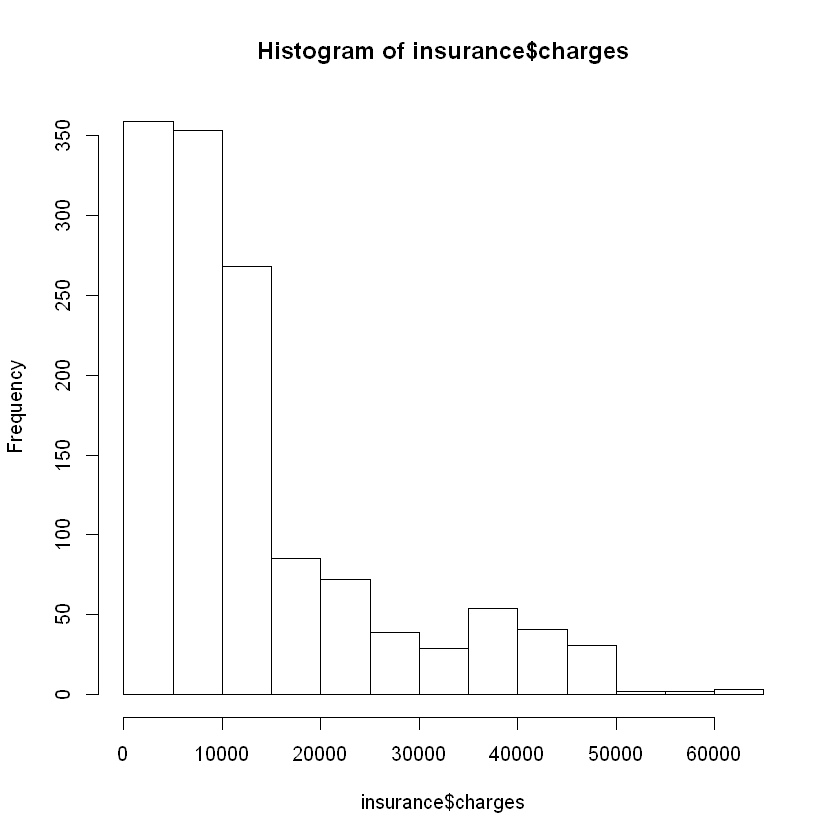

In [5]:
# The mean value of 'charges' is higher than median-rightly skewed
hist(insurance$charges)

In [6]:
# Seeing how other variables are distributed
table(insurance$region)


northeast northwest southeast southwest 
      324       325       364       325 

In [7]:
table(insurance$sex)
# there's an almost evenly distrubuted


female   male 
   662    676 

## Exploring relationships among features - correlation matrix

In [10]:
# We use the cor() command
cor(insurance[c('age', 'bmi', 'children', 'charges')])
# None of the variables are highly correlated with the variable 'charges'

,age,bmi,children,charges
age,1.0000000,0.1092719,0.04246900,0.29900819
bmi,0.1092719,1.0000000,0.01275890,0.19834097
children,0.0424690,0.0127589,1.00000000,0.06799823
charges,0.2990082,0.1983410,0.06799823,1.00000000


## Scatter plot - visualization

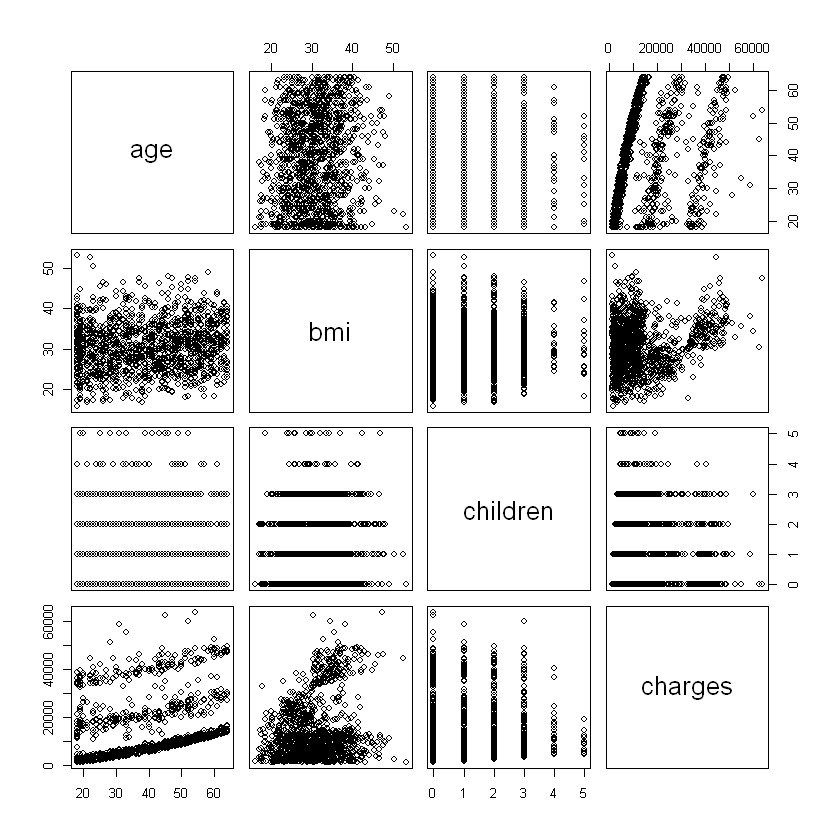

In [12]:
# Creating a scatter plot
pairs(insurance[c('age','bmi','children','charges')])

In [21]:
install.packages("psych")
# Since the previous matrix is not quite good for follow-up, we then enhace the scatter plot matrix
# library(psych)


  There is a binary version available but the source version is later:
      binary source needs_compilation
psych  2.1.3  2.2.5             FALSE



installing the source package 'psych'

Warning message in install.packages("psych"):
"installation of package 'psych' had non-zero exit status"

In [22]:
pairs.panels(insurance[c('age','bmi','children','charges')])

ERROR: Error in pairs.panels(insurance[c("age", "bmi", "children", "charges")]): could not find function "pairs.panels"


## Training the model on the data

In [25]:
# Create the model
model<-lm(charges~age + children + bmi + sex + smoker + region, data = insurance)

In [27]:
summary(model)


Call:
lm(formula = charges ~ age + children + bmi + sex + smoker + 
    region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
bmi                339.2       28.6  11.860  < 2e-16 ***
sexmale           -131.3      332.9  -0.394 0.693348    
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1